# Data Quality Study - US

## Requirements

In [1]:
pip install scipy pandas matplotlib sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing necessary packages
from math import *
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling
from sklearn.preprocessing import MinMaxScaler

In [3]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed',
    metric = True,
    max_iter = 1000)

## Daily Prices

### CSV reader

In [4]:
total_full = pd.read_csv (r'Input_Data_Quality/DailyPrices/Full/total.csv')
ratio_full = pd.read_csv (r'Input_Data_Quality/DailyPrices/Full/ratio.csv', index_col = 0)

ratio_malus_full = 1 - ratio_full

rmf_cluster = ratio_malus_full.drop("MacroTrends").drop(columns = "MacroTrends")
rmf_cluster = rmf_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
rmf_cluster = rmf_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
rmf_cluster = rmf_cluster.drop('Webull').drop(columns = 'Webull')

In [5]:
total_new = pd.read_csv (r'Input_Data_Quality/DailyPrices/21-Now/total.csv')
ratio_new = pd.read_csv (r'Input_Data_Quality/DailyPrices/21-Now/ratio.csv', index_col = 0)

ratio_malus_new = 1 - ratio_new

rmn_cluster = ratio_malus_new.drop("MacroTrends").drop(columns = "MacroTrends")
rmn_cluster = rmn_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
rmn_cluster = rmn_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
rmn_cluster = rmn_cluster.drop('Webull').drop(columns = 'Webull')

In [6]:
total_old = pd.read_csv (r'Input_Data_Quality/DailyPrices/90-10/total.csv')
ratio_old = pd.read_csv (r'Input_Data_Quality/DailyPrices/90-10/ratio.csv', index_col = 0)

ratio_malus_old = 1 - ratio_old

rmo_cluster = ratio_malus_old.drop("MacroTrends").drop(columns = "MacroTrends")
#rmo_cluster = rmo_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
rmo_cluster = rmo_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
#rmo_cluster = rmo_cluster.drop('Webull').drop(columns = 'Webull')

### Multidimensional Scaling - Complete

#### Parameters

In [7]:
mds_fit_full = mds_model.fit(ratio_malus_full.to_numpy())  
mds_coords_full = mds_model.fit_transform(ratio_malus_full.to_numpy()) 
                                                                                                                                  
source_names_full = ratio_malus_full.columns.tolist()

total_ordered_full = []
total_ordered_full = [total_full.loc[total_full['Provider'] == ticker]['Percentage']*1000 for ticker in source_names_full]

source_names_full = list(map(lambda orig_string: orig_string + "", ratio_malus_full.columns.tolist()))

In [8]:
mds_fit_new = mds_model.fit(ratio_malus_new.to_numpy())  
mds_coords_new = mds_model.fit_transform(ratio_malus_new.to_numpy()) 
                                                                                                                                  
source_names_new = ratio_malus_new.columns.tolist()

total_ordered_new = []
total_ordered_new = [total_new.loc[total_new['Provider'] == ticker]['Percentage']*1000 for ticker in source_names_new]

source_names_new = list(map(lambda orig_string: orig_string + "", ratio_malus_new.columns.tolist()))

In [9]:
mds_fit_old = mds_model.fit(ratio_malus_old.to_numpy())  
mds_coords_old = mds_model.fit_transform(ratio_malus_old.to_numpy()) 
                                                                                                                                  
source_names_old = ratio_malus_old.columns.tolist()

total_ordered_old = []
total_ordered_old = [total_old.loc[total_old['Provider'] == ticker]['Percentage']*1000 for ticker in source_names_old]

source_names_old = list(map(lambda orig_string: orig_string + "", ratio_malus_old.columns.tolist()))

#### Visualization

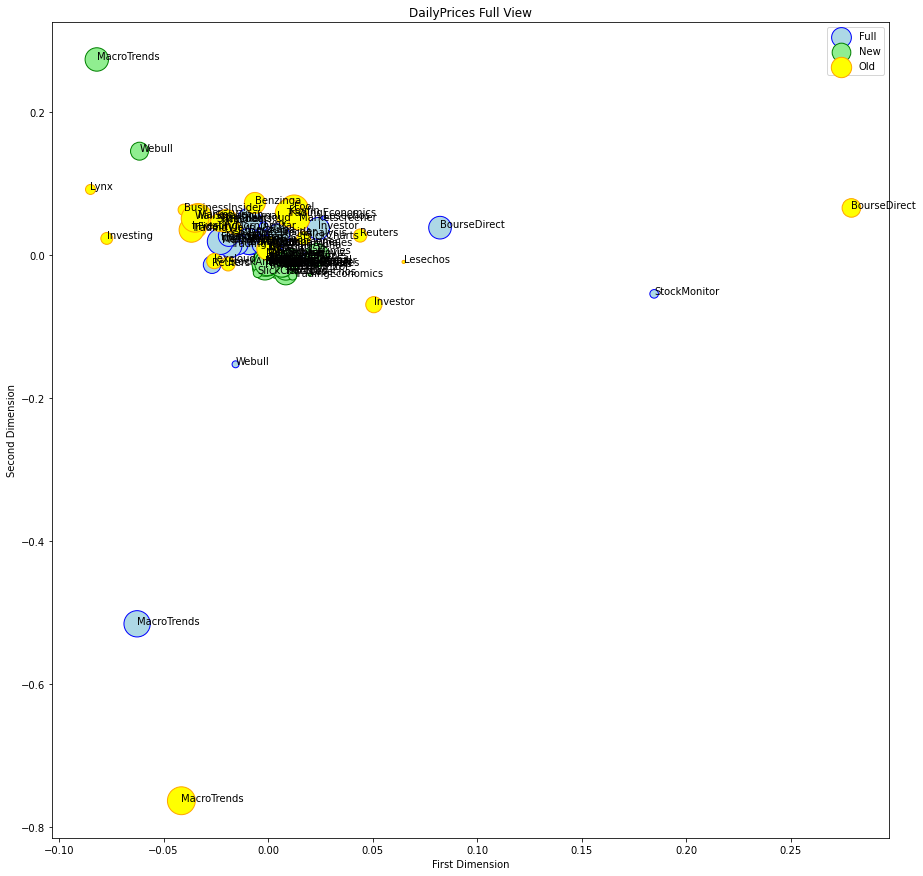

In [10]:
plt.figure(figsize = (15,15))

plt.scatter(mds_coords_full[:,0],mds_coords_full[:,1], total_ordered_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(mds_coords_new[:,0],mds_coords_new[:,1], total_ordered_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(mds_coords_old[:,0],mds_coords_old[:,1], total_ordered_old,
    facecolors = 'yellow', edgecolors = 'orange') 

labels_full = source_names_full
for label, x, y in zip(labels_full, mds_coords_full[:,0], mds_coords_full[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
labels_new = source_names_new
for label, x, y in zip(labels_new, mds_coords_new[:,0], mds_coords_new[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
labels_old = source_names_old
for label, x, y in zip(labels_old, mds_coords_old[:,0], mds_coords_old[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('DailyPrices Full View')    
plt.show()

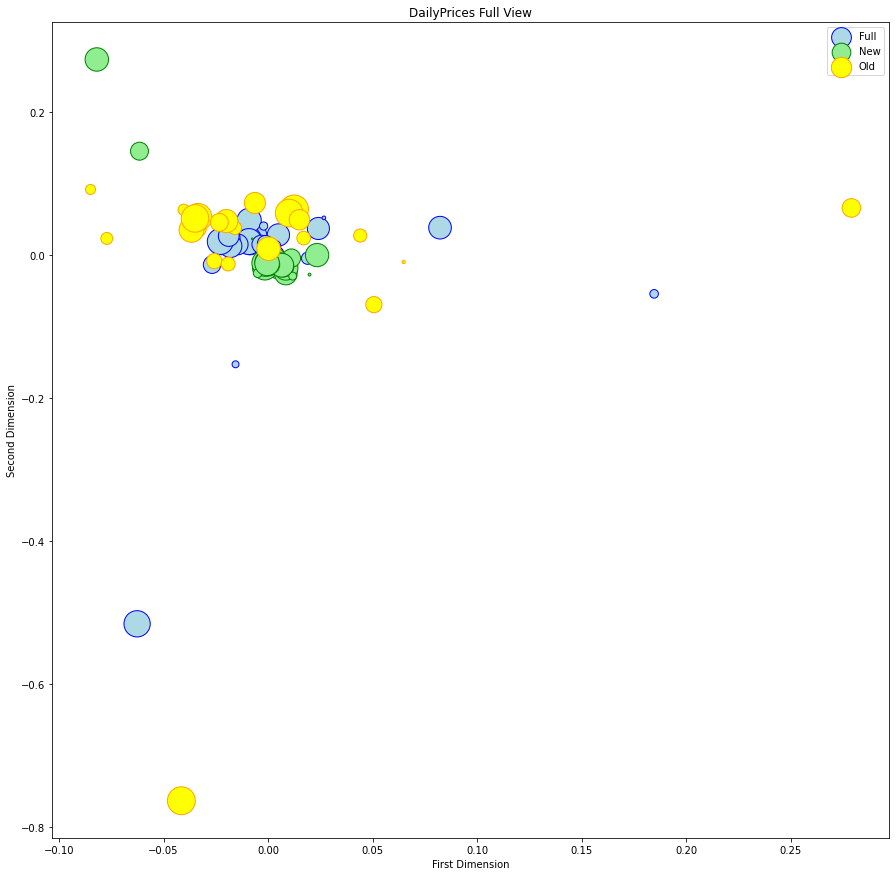

In [11]:
plt.figure(figsize = (15,15))

plt.scatter(mds_coords_full[:,0],mds_coords_full[:,1], total_ordered_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(mds_coords_new[:,0],mds_coords_new[:,1], total_ordered_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(mds_coords_old[:,0],mds_coords_old[:,1], total_ordered_old,
    facecolors = 'yellow', edgecolors = 'orange')

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('DailyPrices Full View')    
plt.show()

### Multidimensional Scaling - Cluster

#### Parameters

In [12]:
mds_fit_c_full = mds_model.fit(rmf_cluster.to_numpy())  
mds_coords_c_full = mds_model.fit_transform(rmf_cluster.to_numpy()) 
                                                                                                                                  
source_names_c_full = rmf_cluster.columns.tolist()

total_ordered_c_full = []
total_ordered_c_full = [total_full.loc[total_full['Provider'] == ticker]['Percentage']*1000 for ticker in source_names_c_full]

source_names_c_full = list(map(lambda orig_string: orig_string + "", rmf_cluster.columns.tolist()))

In [13]:
mds_fit_c_new = mds_model.fit(rmn_cluster.to_numpy())  
mds_coords_c_new = mds_model.fit_transform(rmn_cluster.to_numpy()) 
                                                                                                                                  
source_names_c_new = rmn_cluster.columns.tolist()

total_ordered_c_new = []
total_ordered_c_new = [total_new.loc[total_new['Provider'] == ticker]['Percentage']*1000 for ticker in source_names_c_new]

source_names_c_new = list(map(lambda orig_string: orig_string + "", rmn_cluster.columns.tolist()))

In [14]:
mds_fit_c_old = mds_model.fit(rmo_cluster.to_numpy())  
mds_coords_c_old = mds_model.fit_transform(rmo_cluster.to_numpy()) 
                                                                                                                                  
source_names_c_old = rmo_cluster.columns.tolist()

total_ordered_c_old = []
total_ordered_c_old = [total_old.loc[total_old['Provider'] == ticker]['Percentage']*1000 for ticker in source_names_c_old]

source_names_c_old = list(map(lambda orig_string: orig_string + "", rmo_cluster.columns.tolist()))

In [15]:
print(mds_coords_c_old)

[[-0.02053021 -0.04967622]
 [ 0.024211    0.01682426]
 [ 0.03676007 -0.01118852]
 [ 0.01624534 -0.00410339]
 [-0.02091545 -0.01526095]
 [ 0.00409266  0.04331722]
 [ 0.04809165 -0.05452856]
 [-0.07282596  0.09823384]
 [-0.01817912 -0.01535447]
 [-0.04562897  0.07006713]
 [ 0.06610682  0.06260177]
 [-0.02276363 -0.00431158]
 [ 0.02721463 -0.02818582]
 [ 0.01750416 -0.01448724]
 [ 0.00867343 -0.01771953]
 [-0.06594382 -0.01179964]
 [-0.03880205 -0.03865197]
 [ 0.00613433  0.04418278]
 [ 0.01570054 -0.02801018]
 [ 0.02721463 -0.02818582]
 [ 0.00763996 -0.0137631 ]]


#### Visualization

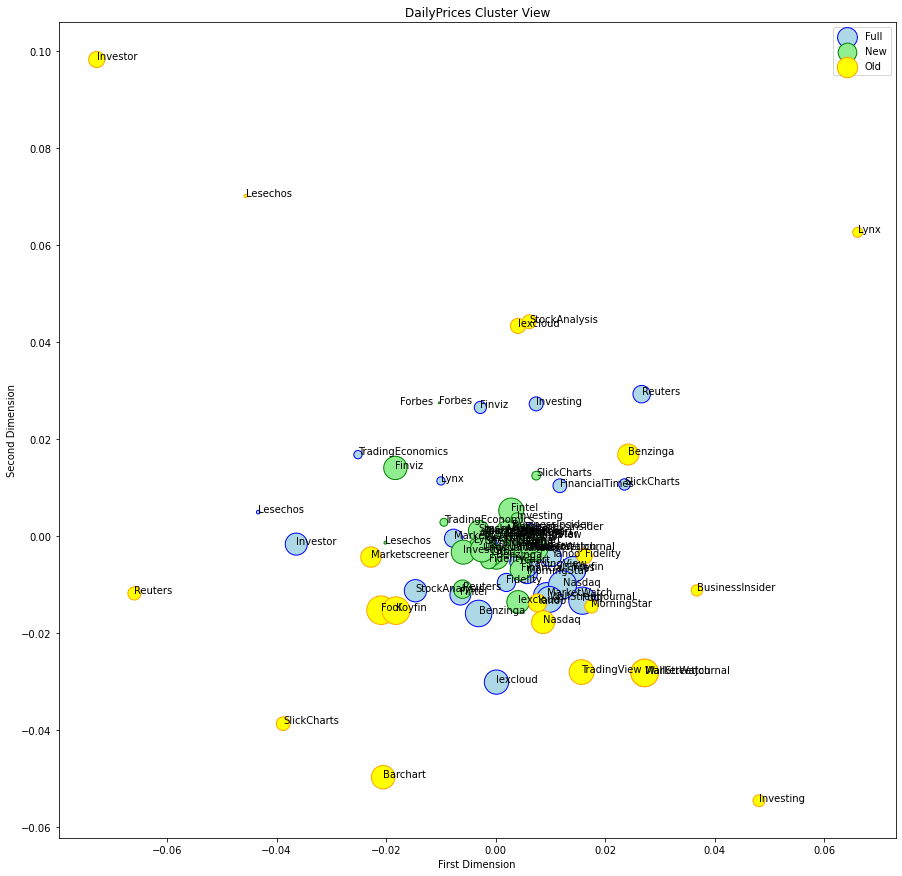

In [16]:
plt.figure(figsize = (15,15))

plt.scatter(mds_coords_c_full[:,0],mds_coords_c_full[:,1], total_ordered_c_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(mds_coords_c_new[:,0],mds_coords_c_new[:,1], total_ordered_c_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(mds_coords_c_old[:,0],mds_coords_c_old[:,1], total_ordered_c_old,
    facecolors = 'yellow', edgecolors = 'orange') 

labels_c_full = source_names_c_full
for label, x, y in zip(labels_c_full, mds_coords_c_full[:,0], mds_coords_c_full[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
labels_c_new = source_names_c_new
for label, x, y in zip(labels_c_new, mds_coords_c_new[:,0], mds_coords_c_new[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
labels_c_old = source_names_c_old
for label, x, y in zip(labels_c_old, mds_coords_c_old[:,0], mds_coords_c_old[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('DailyPrices Cluster View')    
plt.show()

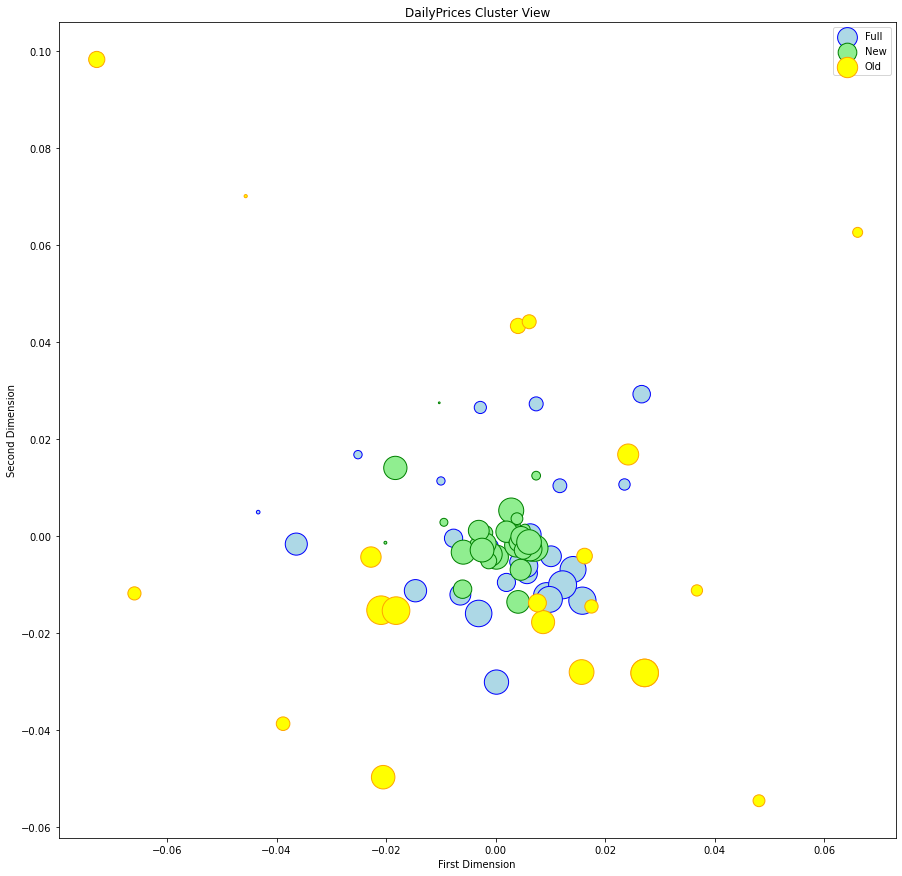

In [17]:
plt.figure(figsize = (15,15))

plt.scatter(mds_coords_c_full[:,0],mds_coords_c_full[:,1], total_ordered_c_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(mds_coords_c_new[:,0],mds_coords_c_new[:,1], total_ordered_c_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(mds_coords_c_old[:,0],mds_coords_c_old[:,1], total_ordered_c_old,
    facecolors = 'yellow', edgecolors = 'orange') 

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('DailyPrices Cluster View')    
plt.show()

## Bars 

### CSV reader

In [18]:
bars_total_full = pd.read_csv (r'Input_Data_Quality/Bars/Full/total.csv')
bars_ratio_full = pd.read_csv (r'Input_Data_Quality/Bars/Full/ratio.csv', index_col = 0)

bars_ratio_malus_full = 1 - bars_ratio_full

bars_rmf_cluster = bars_ratio_malus_full.drop("MacroTrends").drop(columns = "MacroTrends")
bars_rmf_cluster = bars_rmf_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
bars_rmf_cluster = bars_rmf_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
bars_rmf_cluster = bars_rmf_cluster.drop('Webull').drop(columns = 'Webull')

In [19]:
bars_total_new = pd.read_csv (r'Input_Data_Quality/Bars/21-Now/total.csv')
bars_ratio_new = pd.read_csv (r'Input_Data_Quality/Bars/21-Now/ratio.csv', index_col = 0)

bars_ratio_malus_new = 1 - bars_ratio_new

bars_rmn_cluster = bars_ratio_malus_new.drop("MacroTrends").drop(columns = "MacroTrends")
bars_rmn_cluster = bars_rmn_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
bars_rmn_cluster = bars_rmn_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
bars_rmn_cluster = bars_rmn_cluster.drop('Webull').drop(columns = 'Webull')

In [20]:
bars_total_old = pd.read_csv (r'Input_Data_Quality/Bars/90-10/total.csv')
bars_ratio_old = pd.read_csv (r'Input_Data_Quality/Bars/90-10/ratio.csv', index_col = 0)

bars_ratio_malus_old = 1 - bars_ratio_old

bars_rmo_cluster = bars_ratio_malus_old.drop("MacroTrends").drop(columns = "MacroTrends")
#bars_rmo_cluster = bars_rmo_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
bars_rmo_cluster = bars_rmo_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
#bars_rmo_cluster = bars_rmo_cluster.drop('Webull').drop(columns = 'Webull')

### Multidimensional Scaling - Complete

#### Parameters

In [21]:
bars_mds_fit_full = mds_model.fit(bars_ratio_malus_full.to_numpy())  
bars_mds_coords_full = mds_model.fit_transform(bars_ratio_malus_full.to_numpy()) 
                                                                                                                                  
bars_source_names_full = bars_ratio_malus_full.columns.tolist()

bars_total_ordered_full = []
bars_total_ordered_full = [bars_total_full.loc[bars_total_full['Provider'] == ticker]['Percentage']*1000 for ticker in bars_source_names_full]

bars_source_names_full = list(map(lambda orig_string: orig_string + "", bars_ratio_malus_full.columns.tolist()))

In [22]:
bars_mds_fit_new = mds_model.fit(bars_ratio_malus_new.to_numpy())  
bars_mds_coords_new = mds_model.fit_transform(bars_ratio_malus_new.to_numpy()) 
                                                                                                                                  
bars_source_names_new = bars_ratio_malus_new.columns.tolist()

bars_total_ordered_new = []
bars_total_ordered_new = [bars_total_new.loc[bars_total_new['Provider'] == ticker]['Percentage']*1000 for ticker in bars_source_names_new]

bars_source_names_new = list(map(lambda orig_string: orig_string + "", bars_ratio_malus_new.columns.tolist()))

In [23]:
bars_mds_fit_old = mds_model.fit(bars_ratio_malus_old.to_numpy())  
bars_mds_coords_old = mds_model.fit_transform(bars_ratio_malus_old.to_numpy()) 
                                                                                                                                  
bars_source_names_old = bars_ratio_malus_old.columns.tolist()

bars_total_ordered_old = []
bars_total_ordered_old = [bars_total_old.loc[bars_total_old['Provider'] == ticker]['Percentage']*1000 for ticker in bars_source_names_old]

bars_source_names_old = list(map(lambda orig_string: orig_string + "", bars_ratio_malus_old.columns.tolist()))

#### Visualization

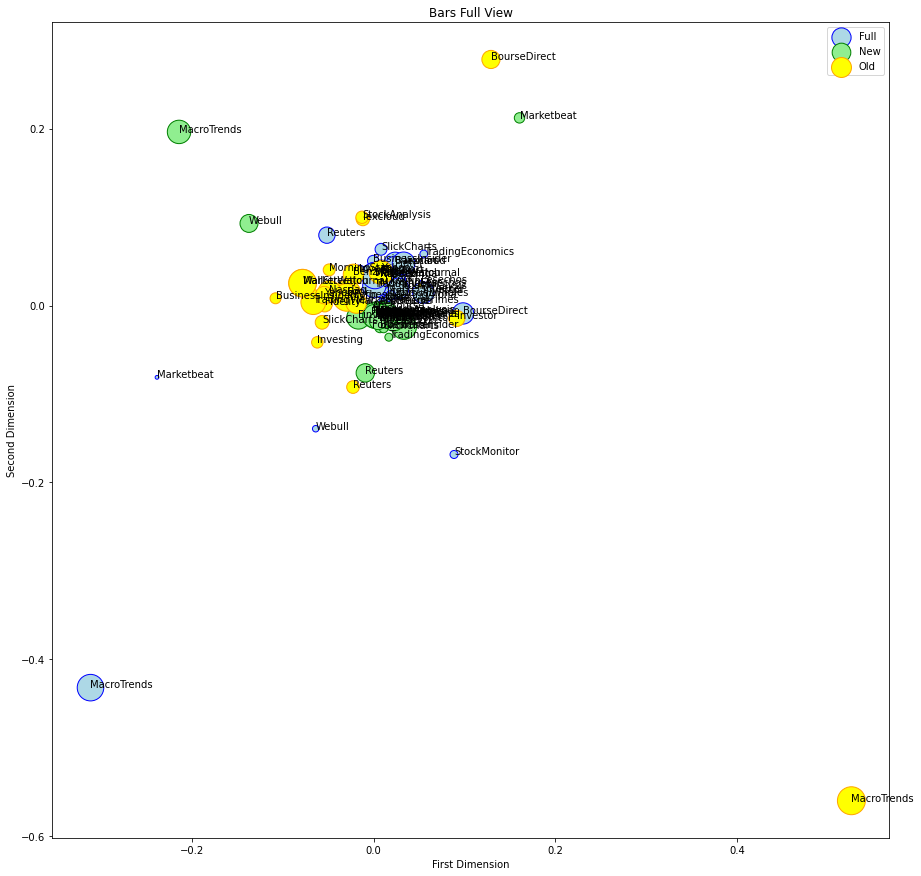

In [24]:
plt.figure(figsize = (15,15))

plt.scatter(bars_mds_coords_full[:,0], bars_mds_coords_full[:,1], bars_total_ordered_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(bars_mds_coords_new[:,0], bars_mds_coords_new[:,1], bars_total_ordered_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(bars_mds_coords_old[:,0], bars_mds_coords_old[:,1], bars_total_ordered_old,
    facecolors = 'yellow', edgecolors = 'orange') 

bars_labels_full = bars_source_names_full
for label, x, y in zip(bars_labels_full, bars_mds_coords_full[:,0], bars_mds_coords_full[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
bars_labels_new = bars_source_names_new
for label, x, y in zip(bars_labels_new, bars_mds_coords_new[:,0], bars_mds_coords_new[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
bars_labels_old = bars_source_names_old
for label, x, y in zip(bars_labels_old, bars_mds_coords_old[:,0], bars_mds_coords_old[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Bars Full View')    
plt.show()

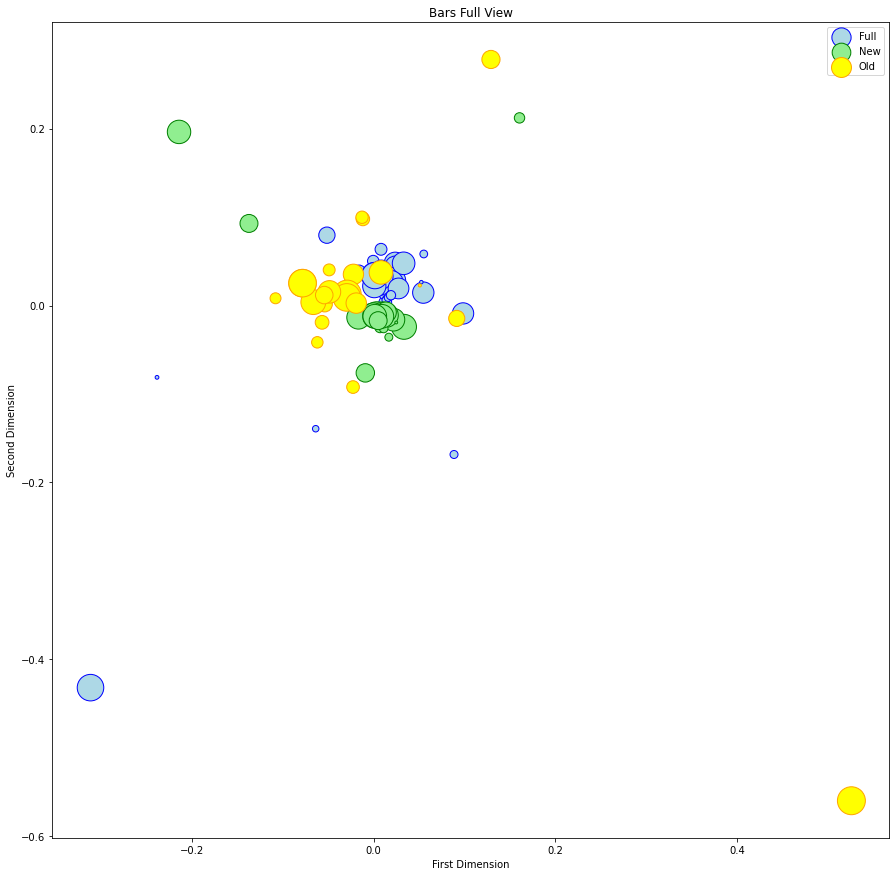

In [25]:
plt.figure(figsize = (15,15))

plt.scatter(bars_mds_coords_full[:,0], bars_mds_coords_full[:,1], bars_total_ordered_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(bars_mds_coords_new[:,0], bars_mds_coords_new[:,1], bars_total_ordered_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(bars_mds_coords_old[:,0], bars_mds_coords_old[:,1], bars_total_ordered_old,
    facecolors = 'yellow', edgecolors = 'orange')

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Bars Full View')    
plt.show()

### Multidimensional Scaling - Cluster

#### Parameters

In [26]:
bars_mds_fit_c_full = mds_model.fit(bars_rmf_cluster.to_numpy())  
bars_mds_coords_c_full = mds_model.fit_transform(bars_rmf_cluster.to_numpy()) 
                                                                                                                                  
bars_source_names_c_full = bars_rmf_cluster.columns.tolist()

bars_total_ordered_c_full = []
bars_total_ordered_c_full = [bars_total_full.loc[bars_total_full['Provider'] == ticker]['Percentage']*1000 for ticker in bars_source_names_c_full]

bars_source_names_c_full = list(map(lambda orig_string: orig_string + "", bars_rmf_cluster.columns.tolist()))

In [27]:
bars_mds_fit_c_new = mds_model.fit(bars_rmn_cluster.to_numpy())  
bars_mds_coords_c_new = mds_model.fit_transform(bars_rmn_cluster.to_numpy()) 
                                                                                                                                  
bars_source_names_c_new = bars_rmn_cluster.columns.tolist()

bars_total_ordered_c_new = []
bars_total_ordered_c_new = [bars_total_new.loc[bars_total_new['Provider'] == ticker]['Percentage']*1000 for ticker in bars_source_names_c_new]

bars_source_names_c_new = list(map(lambda orig_string: orig_string + "", bars_rmn_cluster.columns.tolist()))

In [28]:
bars_mds_fit_c_old = mds_model.fit(bars_rmo_cluster.to_numpy())  
bars_mds_coords_c_old = mds_model.fit_transform(bars_rmo_cluster.to_numpy()) 
                                                                                                                                  
bars_source_names_c_old = bars_rmo_cluster.columns.tolist()

bars_total_ordered_c_old = []
bars_total_ordered_c_old = [bars_total_old.loc[bars_total_old['Provider'] == ticker]['Percentage']*1000 for ticker in bars_source_names_c_old]

bars_source_names_c_old = list(map(lambda orig_string: orig_string + "", bars_rmo_cluster.columns.tolist()))

In [29]:
print(bars_mds_coords_c_old)

[[-0.04656945  0.03746901]
 [ 0.0118155  -0.03000248]
 [ 0.0532164   0.00146113]
 [ 0.00183116 -0.02015891]
 [-0.02881122 -0.01807647]
 [ 0.00341031  0.08138152]
 [ 0.0074955   0.04480053]
 [ 0.10409511  0.08010548]
 [-0.03663044 -0.01888802]
 [-0.05412744 -0.07266464]
 [-0.01162148 -0.01962191]
 [-0.01630322 -0.02991606]
 [-0.02424654  0.00899608]
 [ 0.00576197 -0.00153557]
 [ 0.09409041 -0.05230946]
 [-0.01251806 -0.05021452]
 [-0.0608694   0.0682068 ]
 [-0.0029662   0.0004381 ]
 [ 0.01938173 -0.01525922]
 [-0.00643463  0.00578862]]


#### Visualization

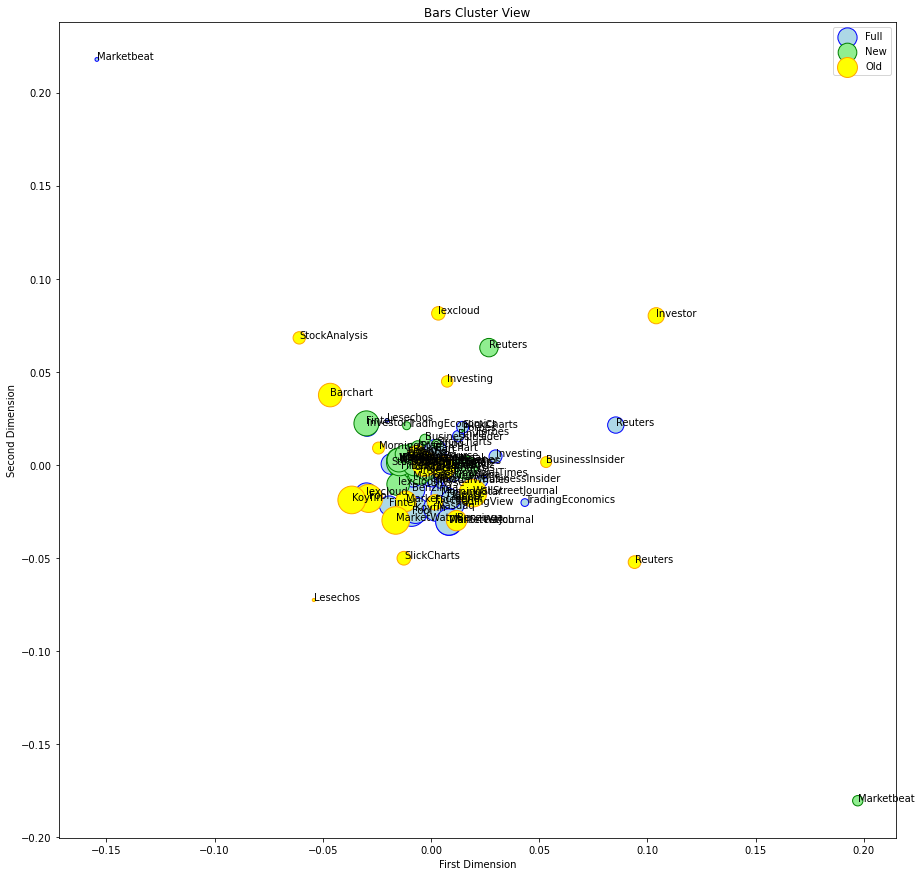

In [30]:
plt.figure(figsize = (15,15))

plt.scatter(bars_mds_coords_c_full[:,0],bars_mds_coords_c_full[:,1], bars_total_ordered_c_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(bars_mds_coords_c_new[:,0],bars_mds_coords_c_new[:,1], bars_total_ordered_c_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(bars_mds_coords_c_old[:,0],bars_mds_coords_c_old[:,1], bars_total_ordered_c_old,
    facecolors = 'yellow', edgecolors = 'orange') 

bars_labels_c_full = bars_source_names_c_full
for label, x, y in zip(bars_labels_c_full, bars_mds_coords_c_full[:,0], bars_mds_coords_c_full[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
bars_labels_c_new = bars_source_names_c_new
for label, x, y in zip(bars_labels_c_new, bars_mds_coords_c_new[:,0], bars_mds_coords_c_new[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
bars_labels_c_old = bars_source_names_c_old
for label, x, y in zip(bars_labels_c_old, bars_mds_coords_c_old[:,0], bars_mds_coords_c_old[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Bars Cluster View')    
plt.show()

## Dividends

### CSV reader

In [31]:
div_total_full = pd.read_csv (r'Input_Data_Quality/Dividends/Full/total.csv')
div_ratio_full = pd.read_csv (r'Input_Data_Quality/Dividends/Full/ratio.csv', index_col = 0)

div_ratio_malus_full = 1 - div_ratio_full

#div_rmf_cluster = div_ratio_malus_full.drop("MacroTrends").drop(columns = "MacroTrends")
#div_rmf_cluster = div_ratio_malus_full.drop('StockMonitor').drop(columns = 'StockMonitor')
#div_rmf_cluster = div_ratio_malus_full.drop('BourseDirect').drop(columns = 'BourseDirect')
div_rmf_cluster = div_ratio_malus_full.drop('Webull').drop(columns = 'Webull')

In [32]:
div_total_new = pd.read_csv (r'Input_Data_Quality/Dividends/21-Now/total.csv')
div_ratio_new = pd.read_csv (r'Input_Data_Quality/Dividends/21-Now/ratio.csv', index_col = 0)

div_ratio_malus_new = 1 - div_ratio_new

#div_rmn_cluster = div_ratio_malus_new.drop("MacroTrends").drop(columns = "MacroTrends")
#div_rmn_cluster = div_rmn_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
#div_rmn_cluster = div_rmn_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
div_rmn_cluster = div_ratio_malus_new.drop('Webull').drop(columns = 'Webull')

In [33]:
div_total_old = pd.read_csv (r'Input_Data_Quality/Dividends/90-10/total.csv')
div_ratio_old = pd.read_csv (r'Input_Data_Quality/Dividends/90-10/ratio.csv', index_col = 0)

div_ratio_malus_old = 1 - div_ratio_old

#div_rmo_cluster = div_ratio_malus_old.drop("MacroTrends").drop(columns = "MacroTrends")
#div_rmo_cluster = div_rmo_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
#div_rmo_cluster = div_rmo_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
div_rmo_cluster = div_ratio_malus_old.drop('Webull').drop(columns = 'Webull')

### Multidimensional Scaling - Complete

#### Parameters

In [34]:
div_mds_fit_full = mds_model.fit(div_ratio_malus_full.to_numpy())  
div_mds_coords_full = mds_model.fit_transform(div_ratio_malus_full.to_numpy()) 
                                                                                                                                  
div_source_names_full = div_ratio_malus_full.columns.tolist()

div_total_ordered_full = []
div_total_ordered_full = [div_total_full.loc[div_total_full['Provider'] == ticker]['Percentage']*1000 for ticker in div_source_names_full]

div_source_names_full = list(map(lambda orig_string: orig_string + "", div_ratio_malus_full.columns.tolist()))

In [35]:
div_mds_fit_new = mds_model.fit(div_ratio_malus_new.to_numpy())  
div_mds_coords_new = mds_model.fit_transform(div_ratio_malus_new.to_numpy()) 
                                                                                                                                  
div_source_names_new = div_ratio_malus_new.columns.tolist()

div_total_ordered_new = []
div_total_ordered_new = [div_total_new.loc[div_total_new['Provider'] == ticker]['Percentage']*1000 for ticker in div_source_names_new]

div_source_names_new = list(map(lambda orig_string: orig_string + "", div_ratio_malus_new.columns.tolist()))

In [36]:
div_mds_fit_old = mds_model.fit(div_ratio_malus_old.to_numpy())  
div_mds_coords_old = mds_model.fit_transform(div_ratio_malus_old.to_numpy()) 
                                                                                                                                  
div_source_names_old = div_ratio_malus_old.columns.tolist()

div_total_ordered_old = []
div_total_ordered_old = [div_total_old.loc[div_total_old['Provider'] == ticker]['Percentage']*1000 for ticker in div_source_names_old]

div_source_names_old = list(map(lambda orig_string: orig_string + "", div_ratio_malus_old.columns.tolist()))

#### Visualization

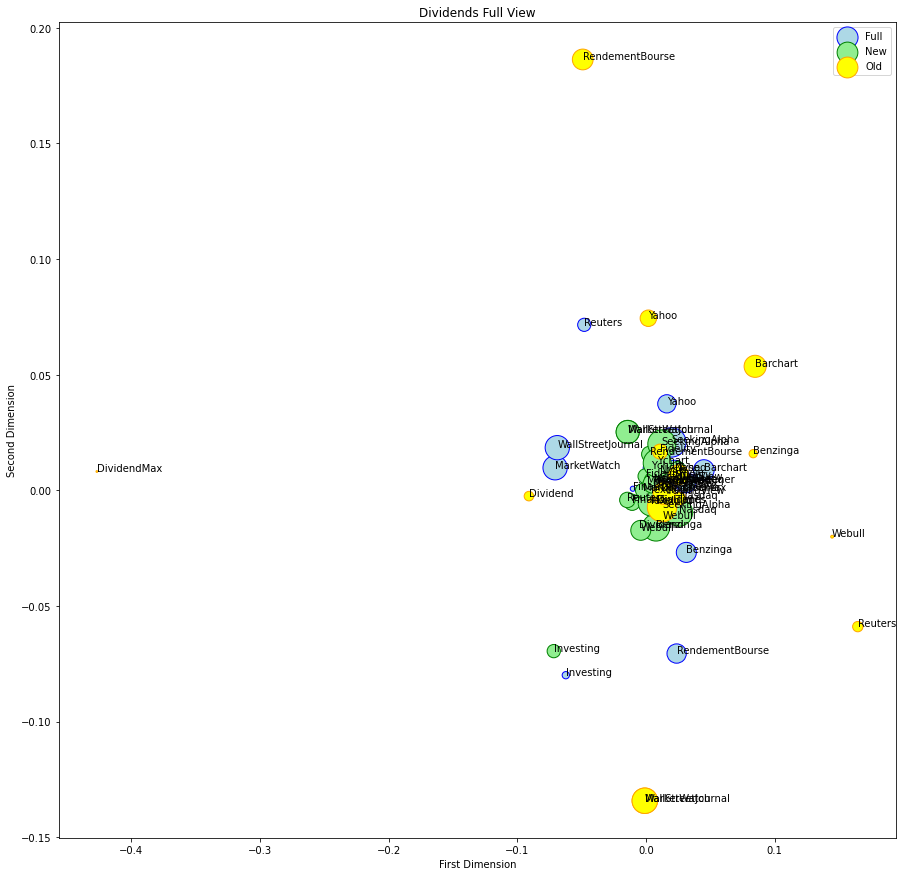

In [37]:
plt.figure(figsize = (15,15))

plt.scatter(div_mds_coords_full[:,0],div_mds_coords_full[:,1], div_total_ordered_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(div_mds_coords_new[:,0],div_mds_coords_new[:,1], div_total_ordered_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(div_mds_coords_old[:,0], div_mds_coords_old[:,1], div_total_ordered_old,
    facecolors = 'yellow', edgecolors = 'orange') 

div_labels_full = div_source_names_full
for label, x, y in zip(div_labels_full, div_mds_coords_full[:,0], div_mds_coords_full[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
div_labels_new = div_source_names_new
for label, x, y in zip(div_labels_new, div_mds_coords_new[:,0], div_mds_coords_new[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
div_labels_old = div_source_names_old
for label, x, y in zip(div_labels_old, div_mds_coords_old[:,0], div_mds_coords_old[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Dividends Full View')    
plt.show()

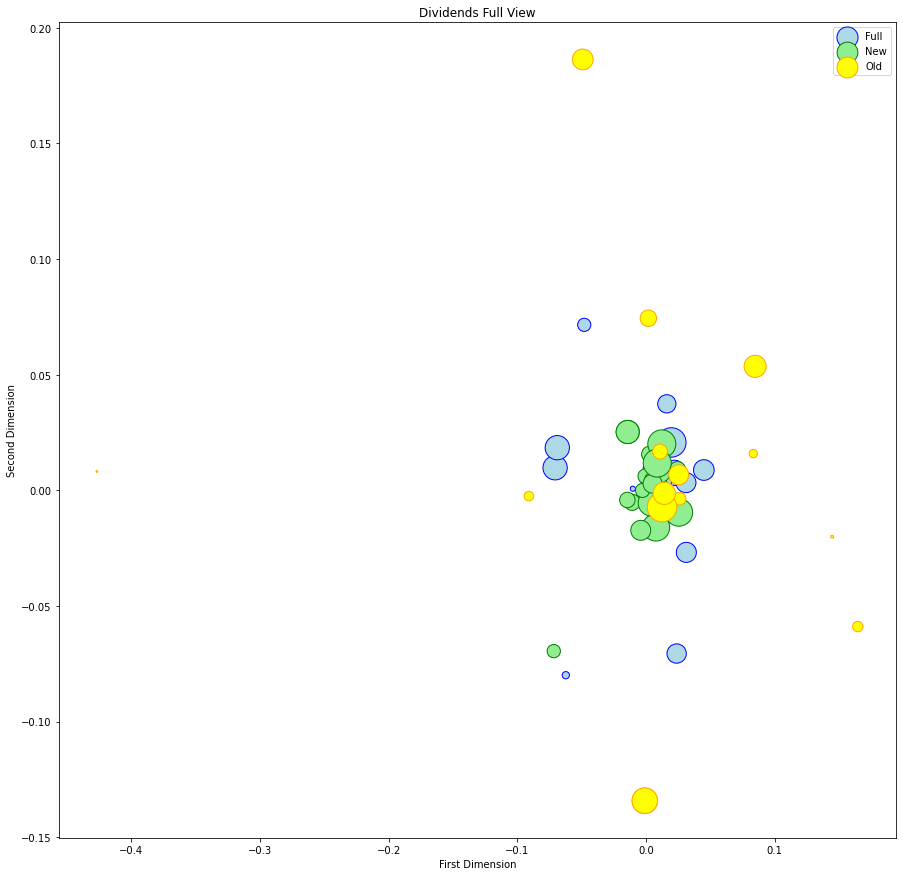

In [38]:
plt.figure(figsize = (15,15))

plt.scatter(div_mds_coords_full[:,0],div_mds_coords_full[:,1], div_total_ordered_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(div_mds_coords_new[:,0],div_mds_coords_new[:,1], div_total_ordered_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(div_mds_coords_old[:,0],div_mds_coords_old[:,1], div_total_ordered_old,
    facecolors = 'yellow', edgecolors = 'orange')

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Dividends Full View')    
plt.show()

### Multidimensional Scaling - Cluster

#### Parameters

In [39]:
div_mds_fit_c_full = mds_model.fit(div_rmf_cluster.to_numpy())  
div_mds_coords_c_full = mds_model.fit_transform(div_rmf_cluster.to_numpy()) 
                                                                                                                                  
div_source_names_c_full = div_rmf_cluster.columns.tolist()

div_total_ordered_c_full = []
div_total_ordered_c_full = [div_total_full.loc[div_total_full['Provider'] == ticker]['Percentage']*1000 for ticker in div_source_names_c_full]

div_source_names_c_full = list(map(lambda orig_string: orig_string + "", div_rmf_cluster.columns.tolist()))

In [40]:
div_mds_fit_c_new = mds_model.fit(div_rmn_cluster.to_numpy())  
div_mds_coords_c_new = mds_model.fit_transform(div_rmn_cluster.to_numpy()) 
                                                                                                                                  
div_source_names_c_new = div_rmn_cluster.columns.tolist()

div_total_ordered_c_new = []
div_total_ordered_c_new = [div_total_new.loc[div_total_new['Provider'] == ticker]['Percentage']*1000 for ticker in div_source_names_c_new]

div_source_names_c_new = list(map(lambda orig_string: orig_string + "", div_rmn_cluster.columns.tolist()))

In [41]:
div_mds_fit_c_old = mds_model.fit(div_rmo_cluster.to_numpy())  
div_mds_coords_c_old = mds_model.fit_transform(div_rmo_cluster.to_numpy()) 
                                                                                                                                  
div_source_names_c_old = div_rmo_cluster.columns.tolist()

div_total_ordered_c_old = []
div_total_ordered_c_old = [div_total_old.loc[div_total_old['Provider'] == ticker]['Percentage']*1000 for ticker in div_source_names_c_old]

div_source_names_c_old = list(map(lambda orig_string: orig_string + "", div_rmo_cluster.columns.tolist()))

In [42]:
print(div_mds_coords_c_old)

[[ 0.03629341 -0.09285476]
 [-0.06237795 -0.02710976]
 [ 0.06184756 -0.00295957]
 [ 0.38022652  0.07187158]
 [ 0.00496675 -0.02660014]
 [-0.01643217  0.13519434]
 [-0.0080772  -0.00557119]
 [-0.01491737 -0.01575778]
 [-0.15215713 -0.13230966]
 [-0.16915313  0.05103719]
 [-0.01902501  0.00391592]
 [-0.02446437 -0.00357468]
 [-0.00718004  0.1343504 ]
 [-0.00954986 -0.08963189]]


#### Visualization

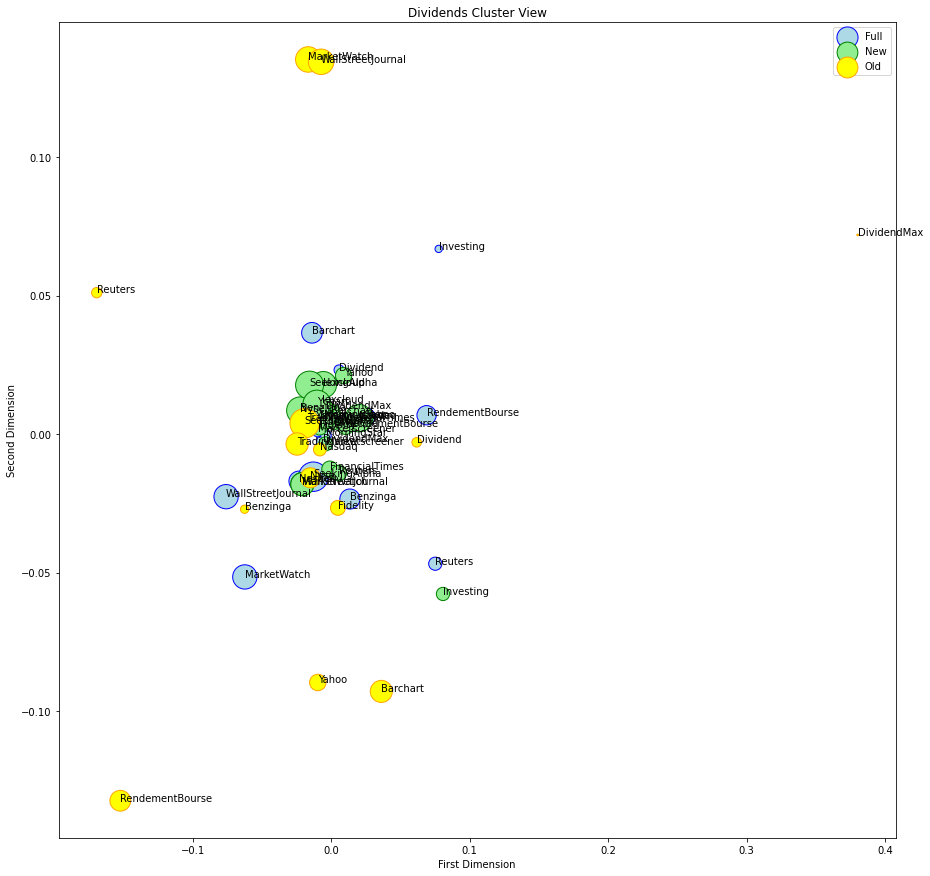

In [43]:
plt.figure(figsize = (15,15))

plt.scatter(div_mds_coords_c_full[:,0],div_mds_coords_c_full[:,1], div_total_ordered_c_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(div_mds_coords_c_new[:,0],div_mds_coords_c_new[:,1], div_total_ordered_c_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(div_mds_coords_c_old[:,0],div_mds_coords_c_old[:,1], div_total_ordered_c_old,
    facecolors = 'yellow', edgecolors = 'orange') 

div_labels_c_full = div_source_names_c_full
for label, x, y in zip(div_labels_c_full, div_mds_coords_c_full[:,0], div_mds_coords_c_full[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
div_labels_c_new = div_source_names_c_new
for label, x, y in zip(div_labels_c_new, div_mds_coords_c_new[:,0], div_mds_coords_c_new[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
div_labels_c_old = div_source_names_c_old
for label, x, y in zip(div_labels_c_old, div_mds_coords_c_old[:,0], div_mds_coords_c_old[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Dividends Cluster View')    
plt.show()

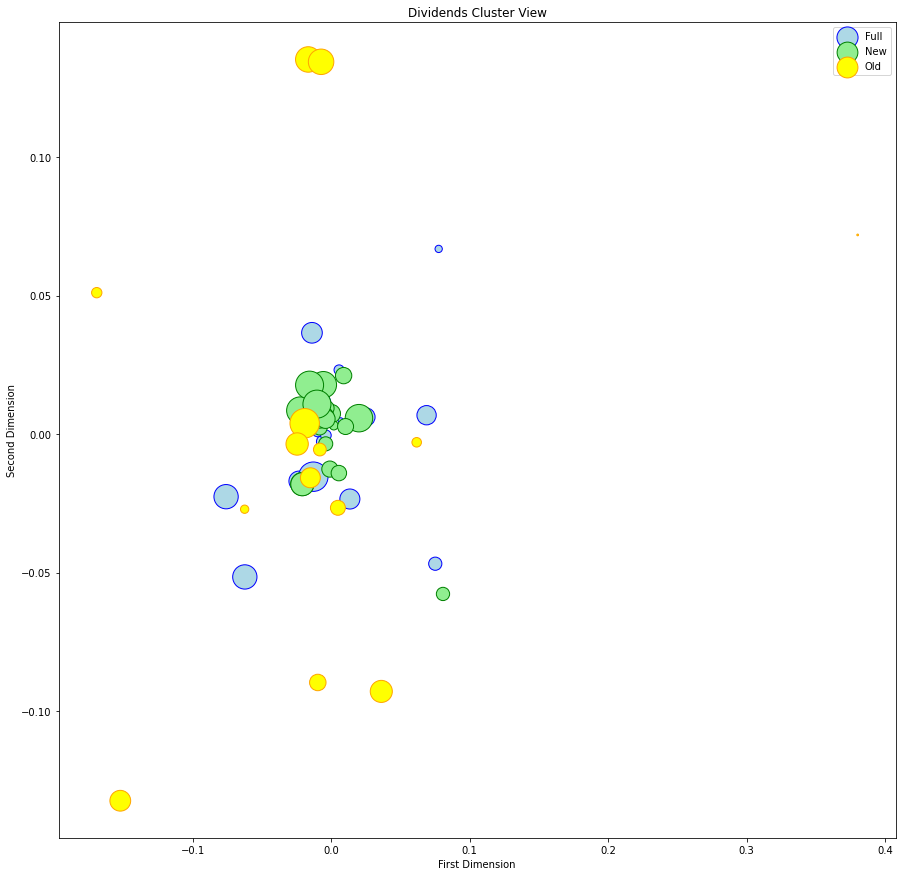

In [44]:
plt.figure(figsize = (15,15))

plt.scatter(div_mds_coords_c_full[:,0],div_mds_coords_c_full[:,1], div_total_ordered_c_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(div_mds_coords_c_new[:,0], div_mds_coords_c_new[:,1], div_total_ordered_c_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(div_mds_coords_c_old[:,0],div_mds_coords_c_old[:,1], div_total_ordered_c_old,
    facecolors = 'yellow', edgecolors = 'orange') 

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Dividends Cluster View')    
plt.show()

## Split

### CSV reader

In [45]:
split_total_full = pd.read_csv (r'Input_Data_Quality/Splits/Full/total.csv')
split_ratio_full = pd.read_csv (r'Input_Data_Quality/Splits/Full/ratio.csv', index_col = 0)

split_ratio_malus_full = 1 - split_ratio_full

split_rmf_cluster = split_ratio_malus_full.drop("MacroTrends").drop(columns = "MacroTrends")
#split_rmf_cluster = split_rmf_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
#split_rmf_cluster = split_rmf_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
split_rmf_cluster = split_rmf_cluster.drop('Webull').drop(columns = 'Webull')

In [46]:
split_total_new = pd.read_csv (r'Input_Data_Quality/Splits/21-Now/total.csv')
split_ratio_new = pd.read_csv (r'Input_Data_Quality/Splits/21-Now/ratio.csv', index_col = 0)

split_ratio_malus_new = 1 - split_ratio_new

split_rmn_cluster = split_ratio_malus_new.drop("MacroTrends").drop(columns = "MacroTrends")
#split_rmn_cluster = split_rmn_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
#split_rmn_cluster = split_rmn_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
split_rmn_cluster = split_rmn_cluster.drop('Webull').drop(columns = 'Webull')

In [47]:
split_total_old = pd.read_csv (r'Input_Data_Quality/Splits/90-10/total.csv')
split_ratio_old = pd.read_csv (r'Input_Data_Quality/Splits/90-10/ratio.csv', index_col = 0)

split_ratio_malus_old = 1 - split_ratio_old

split_rmo_cluster = split_ratio_malus_old.drop("MacroTrends").drop(columns = "MacroTrends")
#split_rmo_cluster = split_rmo_cluster.drop('StockMonitor').drop(columns = 'StockMonitor')
#split_rmo_cluster = split_rmo_cluster.drop('BourseDirect').drop(columns = 'BourseDirect')
split_rmo_cluster = split_rmo_cluster.drop('Webull').drop(columns = 'Webull')

### Multidimensional Scaling - Complete

#### Parameters

In [48]:
split_mds_fit_full = mds_model.fit(split_ratio_malus_full.to_numpy())  
split_mds_coords_full = mds_model.fit_transform(split_ratio_malus_full.to_numpy()) 
                                                                                                                                  
split_source_names_full = split_ratio_malus_full.columns.tolist()

split_total_ordered_full = []
split_total_ordered_full = [split_total_full.loc[split_total_full['Provider'] == ticker]['Percentage']*1000 for ticker in split_source_names_full]

split_source_names_full = list(map(lambda orig_string: orig_string + "", split_ratio_malus_full.columns.tolist()))

In [49]:
split_mds_fit_new = mds_model.fit(split_ratio_malus_new.to_numpy())  
split_mds_coords_new = mds_model.fit_transform(split_ratio_malus_new.to_numpy()) 
                                                                                                                                  
split_source_names_new = split_ratio_malus_new.columns.tolist()

split_total_ordered_new = []
split_total_ordered_new = [split_total_new.loc[split_total_new['Provider'] == ticker]['Percentage']*1000 for ticker in split_source_names_new]

split_source_names_new = list(map(lambda orig_string: orig_string + "", split_ratio_malus_new.columns.tolist()))

In [50]:
split_mds_fit_old = mds_model.fit(split_ratio_malus_old.to_numpy())  
split_mds_coords_old = mds_model.fit_transform(split_ratio_malus_old.to_numpy()) 
                                                                                                                                  
split_source_names_old = split_ratio_malus_old.columns.tolist()

split_total_ordered_old = []
split_total_ordered_old = [split_total_old.loc[split_total_old['Provider'] == ticker]['Percentage']*1000 for ticker in split_source_names_old]

split_source_names_old = list(map(lambda orig_string: orig_string + "", split_ratio_malus_old.columns.tolist()))

#### Visualization

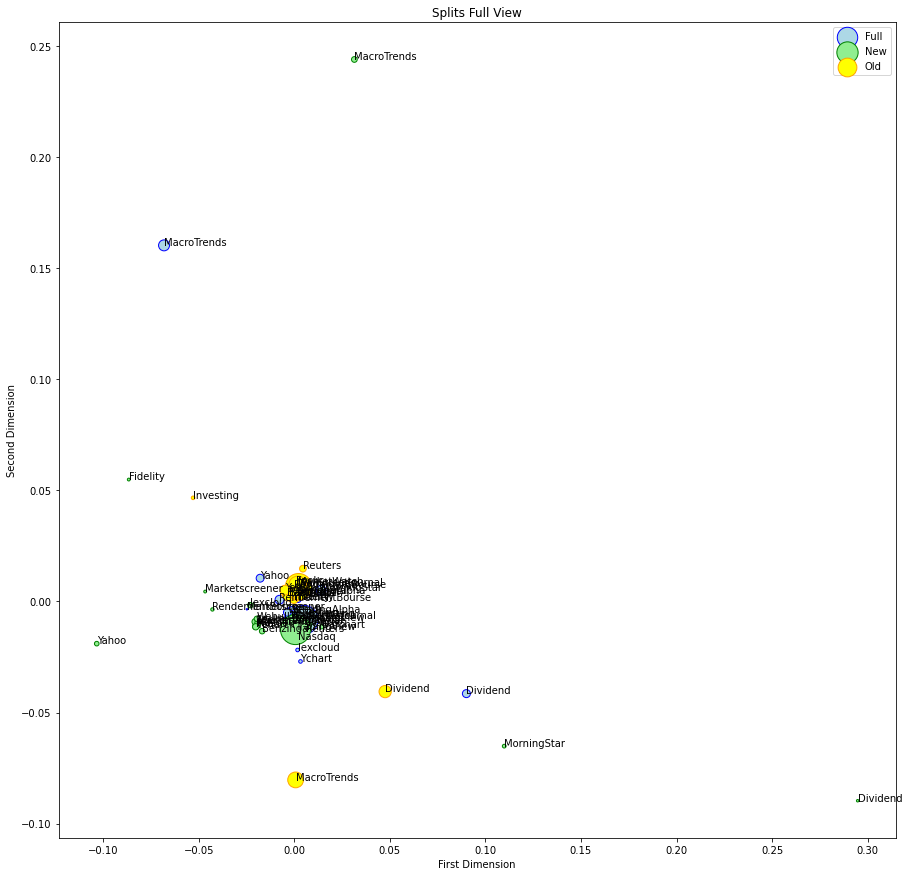

In [51]:
plt.figure(figsize = (15,15))

plt.scatter(split_mds_coords_full[:,0],split_mds_coords_full[:,1], split_total_ordered_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(split_mds_coords_new[:,0],split_mds_coords_new[:,1], split_total_ordered_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(split_mds_coords_old[:,0], split_mds_coords_old[:,1], split_total_ordered_old,
    facecolors = 'yellow', edgecolors = 'orange') 

split_labels_full = split_source_names_full
for label, x, y in zip(split_labels_full, split_mds_coords_full[:,0], split_mds_coords_full[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
split_labels_new = split_source_names_new
for label, x, y in zip(split_labels_new, split_mds_coords_new[:,0], split_mds_coords_new[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
split_labels_old = split_source_names_old
for label, x, y in zip(split_labels_old, split_mds_coords_old[:,0], split_mds_coords_old[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Splits Full View')    
plt.show()

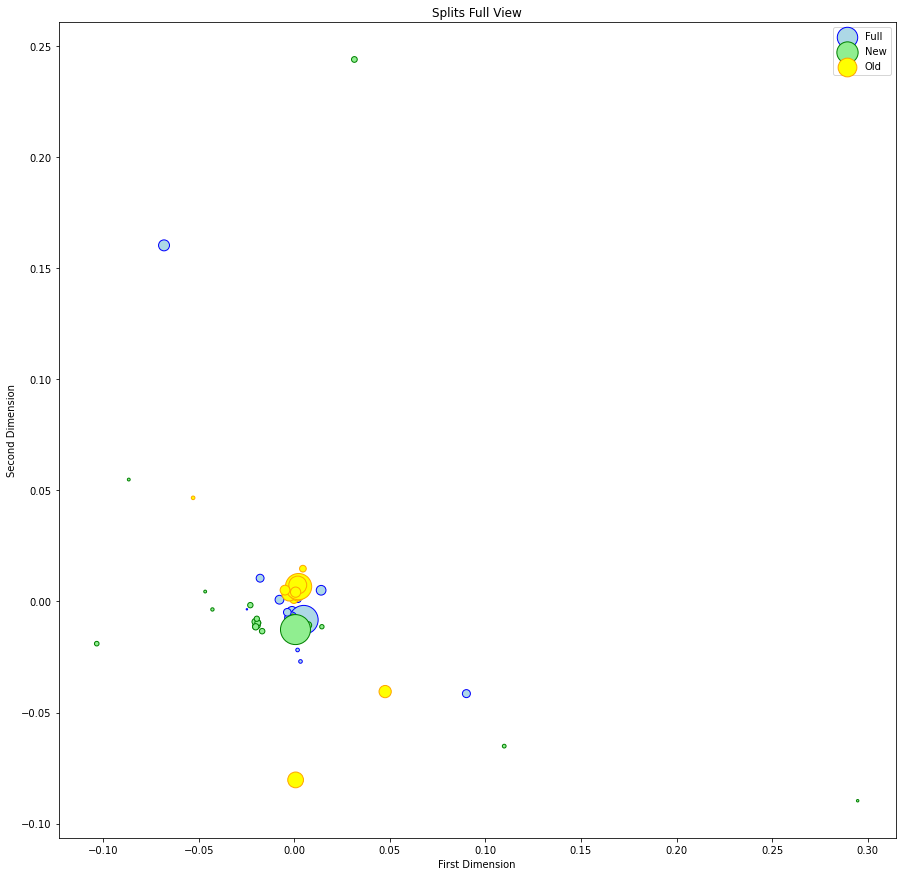

In [52]:
plt.figure(figsize = (15,15))

plt.scatter(split_mds_coords_full[:,0],split_mds_coords_full[:,1], split_total_ordered_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(split_mds_coords_new[:,0],split_mds_coords_new[:,1], split_total_ordered_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(split_mds_coords_old[:,0],split_mds_coords_old[:,1], split_total_ordered_old,
    facecolors = 'yellow', edgecolors = 'orange')

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Splits Full View')    
plt.show()

### Multidimensional Scaling - Cluster

#### Parameters

In [53]:
split_mds_fit_c_full = mds_model.fit(split_rmf_cluster.to_numpy())  
split_mds_coords_c_full = mds_model.fit_transform(split_rmf_cluster.to_numpy()) 
                                                                                                                                  
split_source_names_c_full = split_rmf_cluster.columns.tolist()

split_total_ordered_c_full = []
split_total_ordered_c_full = [split_total_full.loc[split_total_full['Provider'] == ticker]['Percentage']*1000 for ticker in split_source_names_c_full]

split_source_names_c_full = list(map(lambda orig_string: orig_string + "", split_rmf_cluster.columns.tolist()))

In [54]:
split_mds_fit_c_new = mds_model.fit(split_rmn_cluster.to_numpy())  
split_mds_coords_c_new = mds_model.fit_transform(split_rmn_cluster.to_numpy()) 
                                                                                                                                  
split_source_names_c_new = split_rmn_cluster.columns.tolist()

split_total_ordered_c_new = []
split_total_ordered_c_new = [split_total_new.loc[split_total_new['Provider'] == ticker]['Percentage']*1000 for ticker in split_source_names_c_new]

split_source_names_c_new = list(map(lambda orig_string: orig_string + "", split_rmn_cluster.columns.tolist()))

In [55]:
split_mds_fit_c_old = mds_model.fit(split_rmo_cluster.to_numpy())  
split_mds_coords_c_old = mds_model.fit_transform(split_rmo_cluster.to_numpy()) 
                                                                                                                                  
split_source_names_c_old = split_rmo_cluster.columns.tolist()

split_total_ordered_c_old = []
split_total_ordered_c_old = [split_total_old.loc[split_total_old['Provider'] == ticker]['Percentage']*1000 for ticker in split_source_names_c_old]

split_source_names_c_old = list(map(lambda orig_string: orig_string + "", split_rmo_cluster.columns.tolist()))

In [56]:
print(split_mds_coords_c_old)

[[-4.59702603e-05 -2.52748064e-03]
 [ 4.09171187e-03  1.05638784e-03]
 [-2.13073305e-02  6.81765244e-02]
 [ 8.95838858e-04 -6.65213365e-04]
 [-1.30876794e-03  1.30309042e-03]
 [ 2.27103051e-02 -7.24491825e-02]
 [-1.31526439e-03  2.12991175e-03]
 [ 2.74321932e-03 -2.11825300e-03]
 [-1.52663086e-03 -1.25794233e-03]
 [-4.88084838e-03  7.15365857e-03]
 [ 3.52398869e-04  2.82164570e-04]
 [-1.22402957e-03  1.84476534e-03]
 [-1.31517073e-03  2.12997760e-03]
 [ 2.13053855e-03 -5.05840866e-03]]


#### Visualization

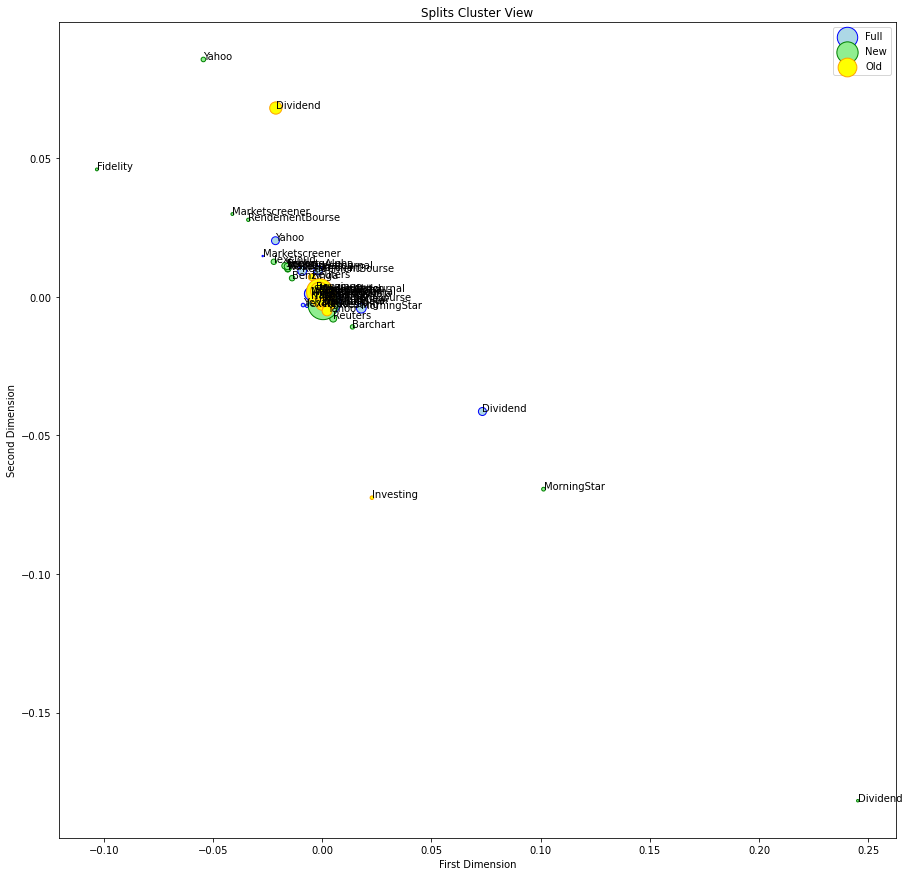

In [57]:
plt.figure(figsize = (15,15))

plt.scatter(split_mds_coords_c_full[:,0],split_mds_coords_c_full[:,1], split_total_ordered_c_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(split_mds_coords_c_new[:,0],split_mds_coords_c_new[:,1], split_total_ordered_c_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(split_mds_coords_c_old[:,0],split_mds_coords_c_old[:,1], split_total_ordered_c_old,
    facecolors = 'yellow', edgecolors = 'orange') 

split_labels_c_full = split_source_names_c_full
for label, x, y in zip(split_labels_c_full, split_mds_coords_c_full[:,0], split_mds_coords_c_full[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
split_labels_c_new = split_source_names_c_new
for label, x, y in zip(split_labels_c_new, split_mds_coords_c_new[:,0], split_mds_coords_c_new[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    
split_labels_c_old = split_source_names_c_old
for label, x, y in zip(split_labels_c_old, split_mds_coords_c_old[:,0], split_mds_coords_c_old[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
    

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Splits Cluster View')    
plt.show()

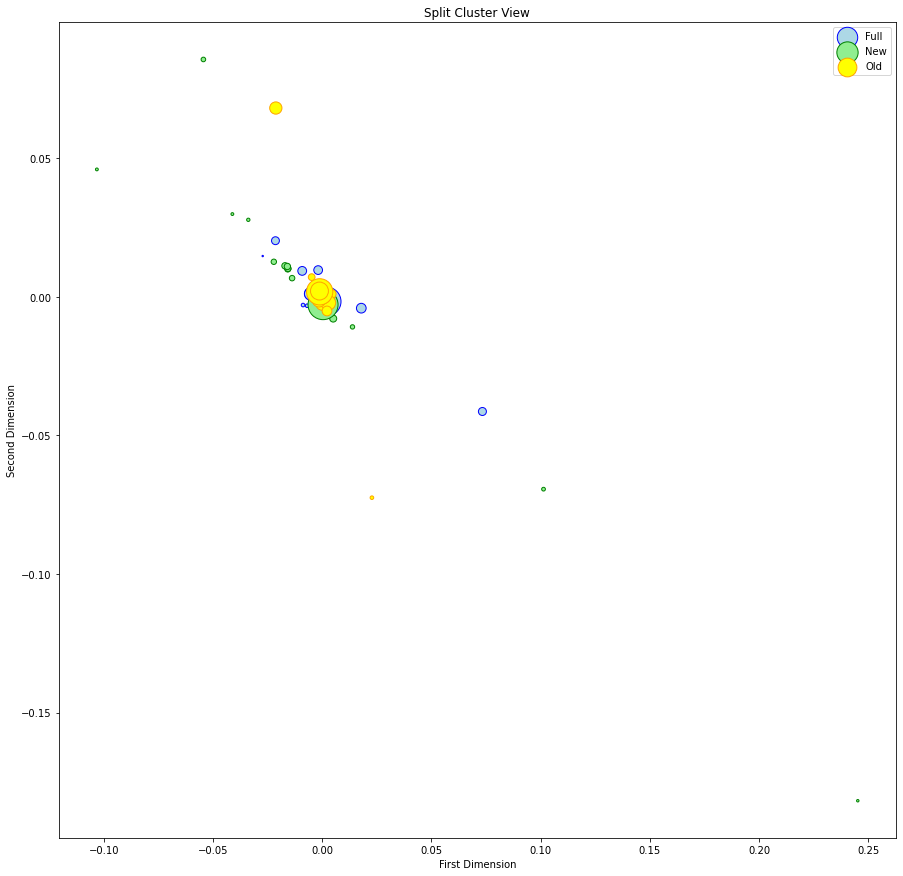

In [58]:
plt.figure(figsize = (15,15))

plt.scatter(split_mds_coords_c_full[:,0],split_mds_coords_c_full[:,1], split_total_ordered_c_full,
    facecolors = 'lightblue', edgecolors = 'blue')

plt.scatter(split_mds_coords_c_new[:,0], split_mds_coords_c_new[:,1], split_total_ordered_c_new,
    facecolors = 'lightgreen', edgecolors = 'green') 

plt.scatter(split_mds_coords_c_old[:,0],split_mds_coords_c_old[:,1], split_total_ordered_c_old,
    facecolors = 'yellow', edgecolors = 'orange') 

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(["Full", "New", "Old"])
plt.title('Split Cluster View')    
plt.show()

## Export

In [59]:
mds_coords_full[1][0]

-0.008615337257674754

In [60]:
print(div_source_names_full)

['Barchart', 'Benzinga', 'Dividend', 'DividendMax', 'Fidelity', 'FinancialTimes', 'Iexcloud', 'Investing', 'Marketscreener', 'MarketWatch', 'MorningStar', 'Nasdaq', 'Nyse', 'RendementBourse', 'Reuters', 'SeekingAlpha', 'TradingView', 'WallStreetJournal', 'Webull', 'Yahoo', 'Ychart']


### DailyPrices

In [61]:
# une scénario
dailyprices_full = {}
for index, name in zip(mds_coords_full, source_names_full):
    dailyprices_full[name] = sqrt(index[0]**2 + index[1]**2)

dp_full = pd.DataFrame.from_dict(dailyprices_full, orient='index')
dp_full.rename(columns = {0:'DP Full'}, inplace = True)

In [62]:
dailyprices_new = {}
for index, name in zip(mds_coords_new, source_names_new):
    dailyprices_new[name] = sqrt(index[0]**2 + index[1]**2)

dp_new = pd.DataFrame.from_dict(dailyprices_new, orient='index')
dp_new.rename(columns = {0:'DP New'}, inplace = True)

In [63]:
dailyprices_old = {}
for index, name in zip(mds_coords_old, source_names_old):
    dailyprices_old[name] = sqrt(index[0]**2 + index[1]**2)

dp_old = pd.DataFrame.from_dict(dailyprices_old, orient='index')
dp_old.rename(columns = {0:'DP Old'}, inplace = True)

In [64]:
dp = pd.concat([dp_full, dp_new, dp_old], axis = 1)

### Bars

In [65]:
# une scénario
bars_full = {}
for index, name in zip(bars_mds_coords_full, bars_source_names_full):
    bars_full[name] = sqrt(index[0]**2 + index[1]**2)

bars_full = pd.DataFrame.from_dict(bars_full, orient='index')
bars_full.rename(columns = {0:'Bars Full'}, inplace = True)

In [66]:
bars_new = {}
for index, name in zip(bars_mds_coords_new, bars_source_names_new):
    bars_new[name] = sqrt(index[0]**2 + index[1]**2)

bars_new = pd.DataFrame.from_dict(bars_new, orient='index')
bars_new.rename(columns = {0:'Bars New'}, inplace = True)

In [67]:
bars_old = {}
for index, name in zip(bars_mds_coords_old, bars_source_names_old):
    bars_old[name] = sqrt(index[0]**2 + index[1]**2)

bars_old = pd.DataFrame.from_dict(bars_old, orient='index')
bars_old.rename(columns = {0:'Bars Old'}, inplace = True)

In [68]:
bars = pd.concat([bars_full, bars_new, bars_old], axis = 1)

### Dividends

In [69]:
# une scénario
div_full = {}
for index, name in zip(div_mds_coords_full, div_source_names_full):
    div_full[name] = sqrt(index[0]**2 + index[1]**2)

div_full = pd.DataFrame.from_dict(div_full, orient='index')
div_full.rename(columns = {0:'Dividends Full'}, inplace = True)

In [70]:
div_new = {}
for index, name in zip(div_mds_coords_new, div_source_names_new):
    div_new[name] = sqrt(index[0]**2 + index[1]**2)

div_new = pd.DataFrame.from_dict(div_new, orient='index')
div_new.rename(columns = {0:'Dividends New'}, inplace = True)

In [71]:
div_old = {}
for index, name in zip(div_mds_coords_old, div_source_names_old):
    div_old[name] = sqrt(index[0]**2 + index[1]**2)

div_old = pd.DataFrame.from_dict(div_old, orient='index')
div_old.rename(columns = {0:'Dividends Old'}, inplace = True)

In [72]:
div = pd.concat([div_full, div_new, div_old], axis = 1)

### Split

In [73]:
# une scénario
split_full = {}
for index, name in zip(split_mds_coords_full, split_source_names_full):
    split_full[name] = sqrt(index[0]**2 + index[1]**2)

split_full = pd.DataFrame.from_dict(split_full, orient='index')
split_full.rename(columns = {0:'Splits Full'}, inplace = True)

In [74]:
split_new = {}
for index, name in zip(split_mds_coords_new, split_source_names_new):
    split_new[name] = sqrt(index[0]**2 + index[1]**2)

split_new = pd.DataFrame.from_dict(split_new, orient='index')
split_new.rename(columns = {0:'Splits New'}, inplace = True)

In [75]:
split_old = {}
for index, name in zip(split_mds_coords_old, split_source_names_old):
    split_old[name] = sqrt(index[0]**2 + index[1]**2)

split_old = pd.DataFrame.from_dict(split_old, orient='index')
split_old.rename(columns = {0:'Splits Old'}, inplace = True)

In [76]:
split = pd.concat([split_full, split_new, split_old], axis = 1)

### Merge

In [77]:
data_quality = pd.concat([dp, bars, div, split], axis = 1)

In [78]:
data_quality

,DP Full,DP New,DP Old,Bars Full,Bars New,Bars Old,Dividends Full,Dividends New,Dividends Old,Splits Full,Splits New,Splits Old
AbcBourse,0.001620,0.001141,NaN,0.006266,0.004048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barchart,0.018037,0.010918,0.009172,0.053482,0.014486,0.038261,0.045854,0.009559,0.100384,0.004629,0.018374,0.003499
Benzinga,0.033020,0.015352,0.073487,0.037707,0.014278,0.041770,0.041276,0.017819,0.084867,0.008734,0.021506,0.004085
BourseDirect,0.090817,0.016704,0.286666,0.098733,0.016913,0.306739,NaN,NaN,NaN,NaN,NaN,NaN
BusinessInsider,0.033320,0.014375,0.075373,0.050268,0.025830,0.108431,NaN,NaN,NaN,NaN,NaN,NaN
Cnbc,0.014734,0.016545,NaN,0.021044,0.013711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fidelity,0.031888,0.014435,0.049691,0.037732,0.017613,0.054036,0.023013,0.006105,0.020019,0.002140,0.102533,0.001001
FinancialTimes,0.004814,0.004944,NaN,0.013063,0.010303,NaN,0.010227,0.011884,NaN,NaN,NaN,NaN
Fintel,0.028690,0.017170,NaN,0.050589,0.041092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Finviz,0.019281,0.023416,NaN,0.020167,0.021616,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
data_quality.to_csv('data_quality_export.csv', index=True)